# 資料集
[Scikit-Learn資料集](https://scikit-learn.org/stable/datasets/index.html#toy-datasets)

# 波士頓房價數據集 (迴歸問題):
CRIM：人均犯罪率

ZN：25,000平方英尺以上民用土地的比例

INDUS：城镇非零售业商用土地比例

CHAS：是否邻近查尔斯河，1是邻近，0是不邻近

NOX：一氧化氮浓度（千万分之一）

RM：住宅的平均房间数

AGE：自住且建于1940年前的房屋比例

DIS：到5个波士顿就业中心的加权距离

RAD：到高速公路的便捷度指数

TAX：每万元的房产税率

PTRATIO：城镇学生教师比例

B： 1000(Bk − 0.63)2 其中Bk是城镇中黑人比例

LSTAT：低收入人群比例

MEDV：自住房中位数价格，单位是千元

In [4]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
df = pd.DataFrame(boston["data"],columns=boston["feature_names"])
df["ans"] = boston["target"] # 加入(資料答案)=(鳶尾花品種名稱)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ans
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(boston["data"],boston["target"],test_size=0.1) 
reg = DecisionTreeRegressor(max_depth=5) # 建立決策樹
reg.fit(x_train,y_train) # 開始訓練

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [10]:
from sklearn.metrics import accuracy_score
pre = reg.predict(x_test)
pre

array([26.44242424, 13.0173913 , 26.44242424, 21.54166667, 22.72934783,
       44.41111111, 20.28148148, 13.975     , 22.72934783, 13.975     ,
       20.28148148, 26.44242424, 34.15416667, 29.775     , 22.72934783,
       13.975     , 20.28148148, 22.72934783, 21.54166667, 13.0173913 ,
       29.775     , 20.28148148, 20.28148148, 21.54166667, 34.15416667,
       20.28148148, 15.        , 49.27      , 22.72934783, 21.54166667,
        9.23333333, 17.3       , 22.72934783, 22.72934783, 20.28148148,
       22.72934783, 22.72934783, 34.15416667, 26.44242424, 22.72934783,
       20.28148148,  9.23333333, 22.72934783, 20.28148148, 20.28148148,
       26.44242424, 22.72934783,  9.23333333, 21.54166667, 44.41111111,
       13.0173913 ])

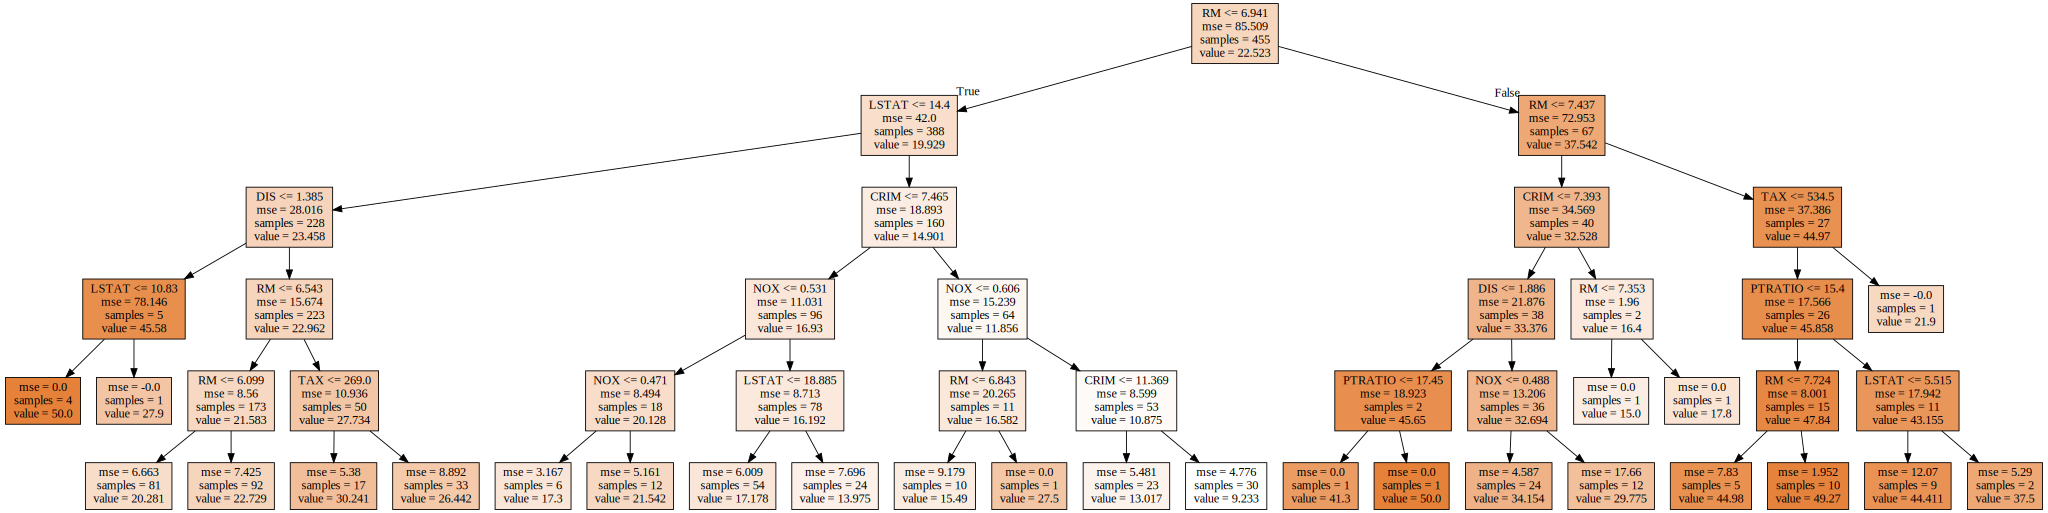

In [11]:
from sklearn.tree import export_graphviz
import graphviz
g = export_graphviz(reg,
                    feature_names=boston["feature_names"],
                    filled=True)
graphviz.Source(g)

In [ ]:
# if TAX <= 269.0:
#     mse = 5.38     = Mean-Square Error
#     samples = 17   = 樣本數
#     value = 30.241 = 回傳值
# else:
    

1. right = 正確答案
2. pre = 預測結果
3. mean = 平均值

# (1)Mean-Square Error(用於單個模型)
$ MSE = \frac{1}{n}\sum_{i=1}^n{(x_i-\mu)^2} $
# (2)Mean-Absolute Error
$ MAE = \frac{1}{n}\sum_{i=1}^n{|x_i-\mu|} $

# (3)[$ r^2-Score $](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html?highlight=r2_score#sklearn.metrics.r2_score)
$ a=\sum{(pre-right)^2} $

$ b=\sum{(right-mean)^2} $

$ r^2=\frac{a}{b} $
1. if $ r^2=0 $,a=0(pre=right),(最佳)
2. if $ r^2=1 $,a=b(pre=mean),(瞎猜)
3. if $ r^2<=0.5 $,可接受
4. if $ r^2>0.5 $,不可接受

In [17]:
from sklearn.metrics import r2_score
pre = reg.predict(x_test)
print("pre:",pre)
print("r2_score = ",r2_score(y_test,pre))

pre: [26.44242424 13.0173913  26.44242424 21.54166667 22.72934783 44.41111111
 20.28148148 13.975      22.72934783 13.975      20.28148148 26.44242424
 34.15416667 29.775      22.72934783 13.975      20.28148148 22.72934783
 21.54166667 13.0173913  29.775      20.28148148 20.28148148 21.54166667
 34.15416667 20.28148148 15.         49.27       22.72934783 21.54166667
  9.23333333 17.3        22.72934783 22.72934783 20.28148148 22.72934783
 22.72934783 34.15416667 26.44242424 22.72934783 20.28148148  9.23333333
 22.72934783 20.28148148 20.28148148 26.44242424 22.72934783  9.23333333
 21.54166667 44.41111111 13.0173913 ]
r2_score =  0.8615195495042779


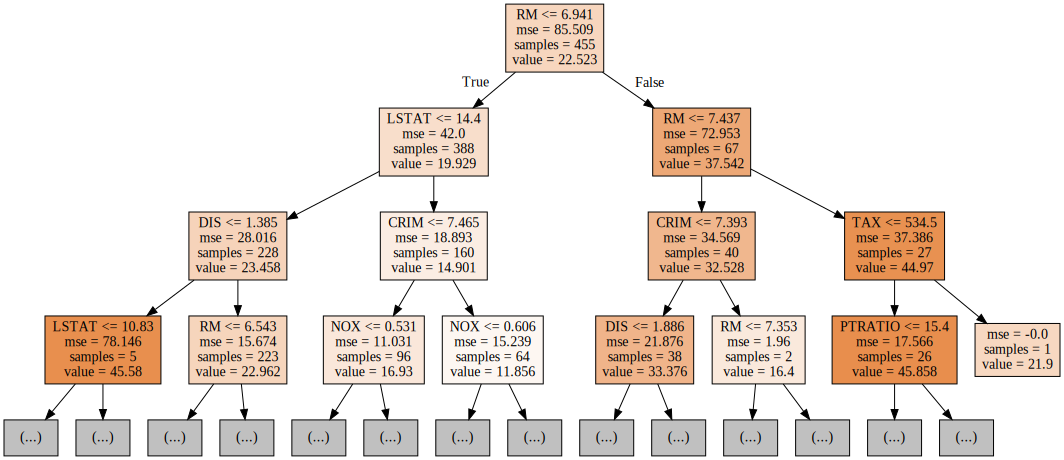

In [14]:
from sklearn.tree import export_graphviz
import graphviz
g = export_graphviz(reg,
                    feature_names=boston["feature_names"],
                    filled=True,
                    max_depth=3)
graphviz.Source(g)